* 나중에 살펴보기
### plotly
```
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact
```

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [70]:
train = pd.read_csv('./_data/train.csv', index_col=0)#id를 인덱스로
test = pd.read_csv('./_data/test.csv', index_col=0)

## train.csv : 학습 데이터
* id: 데이터 고유 id
* age: 나이
* sex: 성별 (여자 = 0, 남자 = 1)
* cp: 가슴 통증(chest pain) 종류 
    * 0 : asymptomatic 무증상
    * 1 : atypical angina 일반적이지 않은 협심증
    * 2 : non-anginal pain 협심증이 아닌 통증
    * 3 : typical angina 일반적인 협심증
* trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
* chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
* fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
* restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
    * 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    * 1: 정상
    * 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: (maximum heart rate achieved) 최대 심박수
* exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
* oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
* slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
    * 0: downsloping 하강
    * 1: flat 평탄
    * 2: upsloping 상승
* ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
* Null 값은 숫자 4로 인코딩됨 
* thal: thalassemia 지중해빈혈 여부
    * 0 = Null 
    * 1 = normal 정상
    * 2 = fixed defect 고정 결함
    * 3 = reversable defect 가역 결함
* target: 심장 질환 진단 여부
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing

In [5]:
train.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       151 non-null    int64  
 1   sex       151 non-null    int64  
 2   cp        151 non-null    int64  
 3   trestbps  151 non-null    int64  
 4   chol      151 non-null    int64  
 5   fbs       151 non-null    int64  
 6   restecg   151 non-null    int64  
 7   thalach   151 non-null    int64  
 8   exang     151 non-null    int64  
 9   oldpeak   151 non-null    float64
 10  slope     151 non-null    int64  
 11  ca        151 non-null    int64  
 12  thal      151 non-null    int64  
 13  target    151 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 17.7 KB


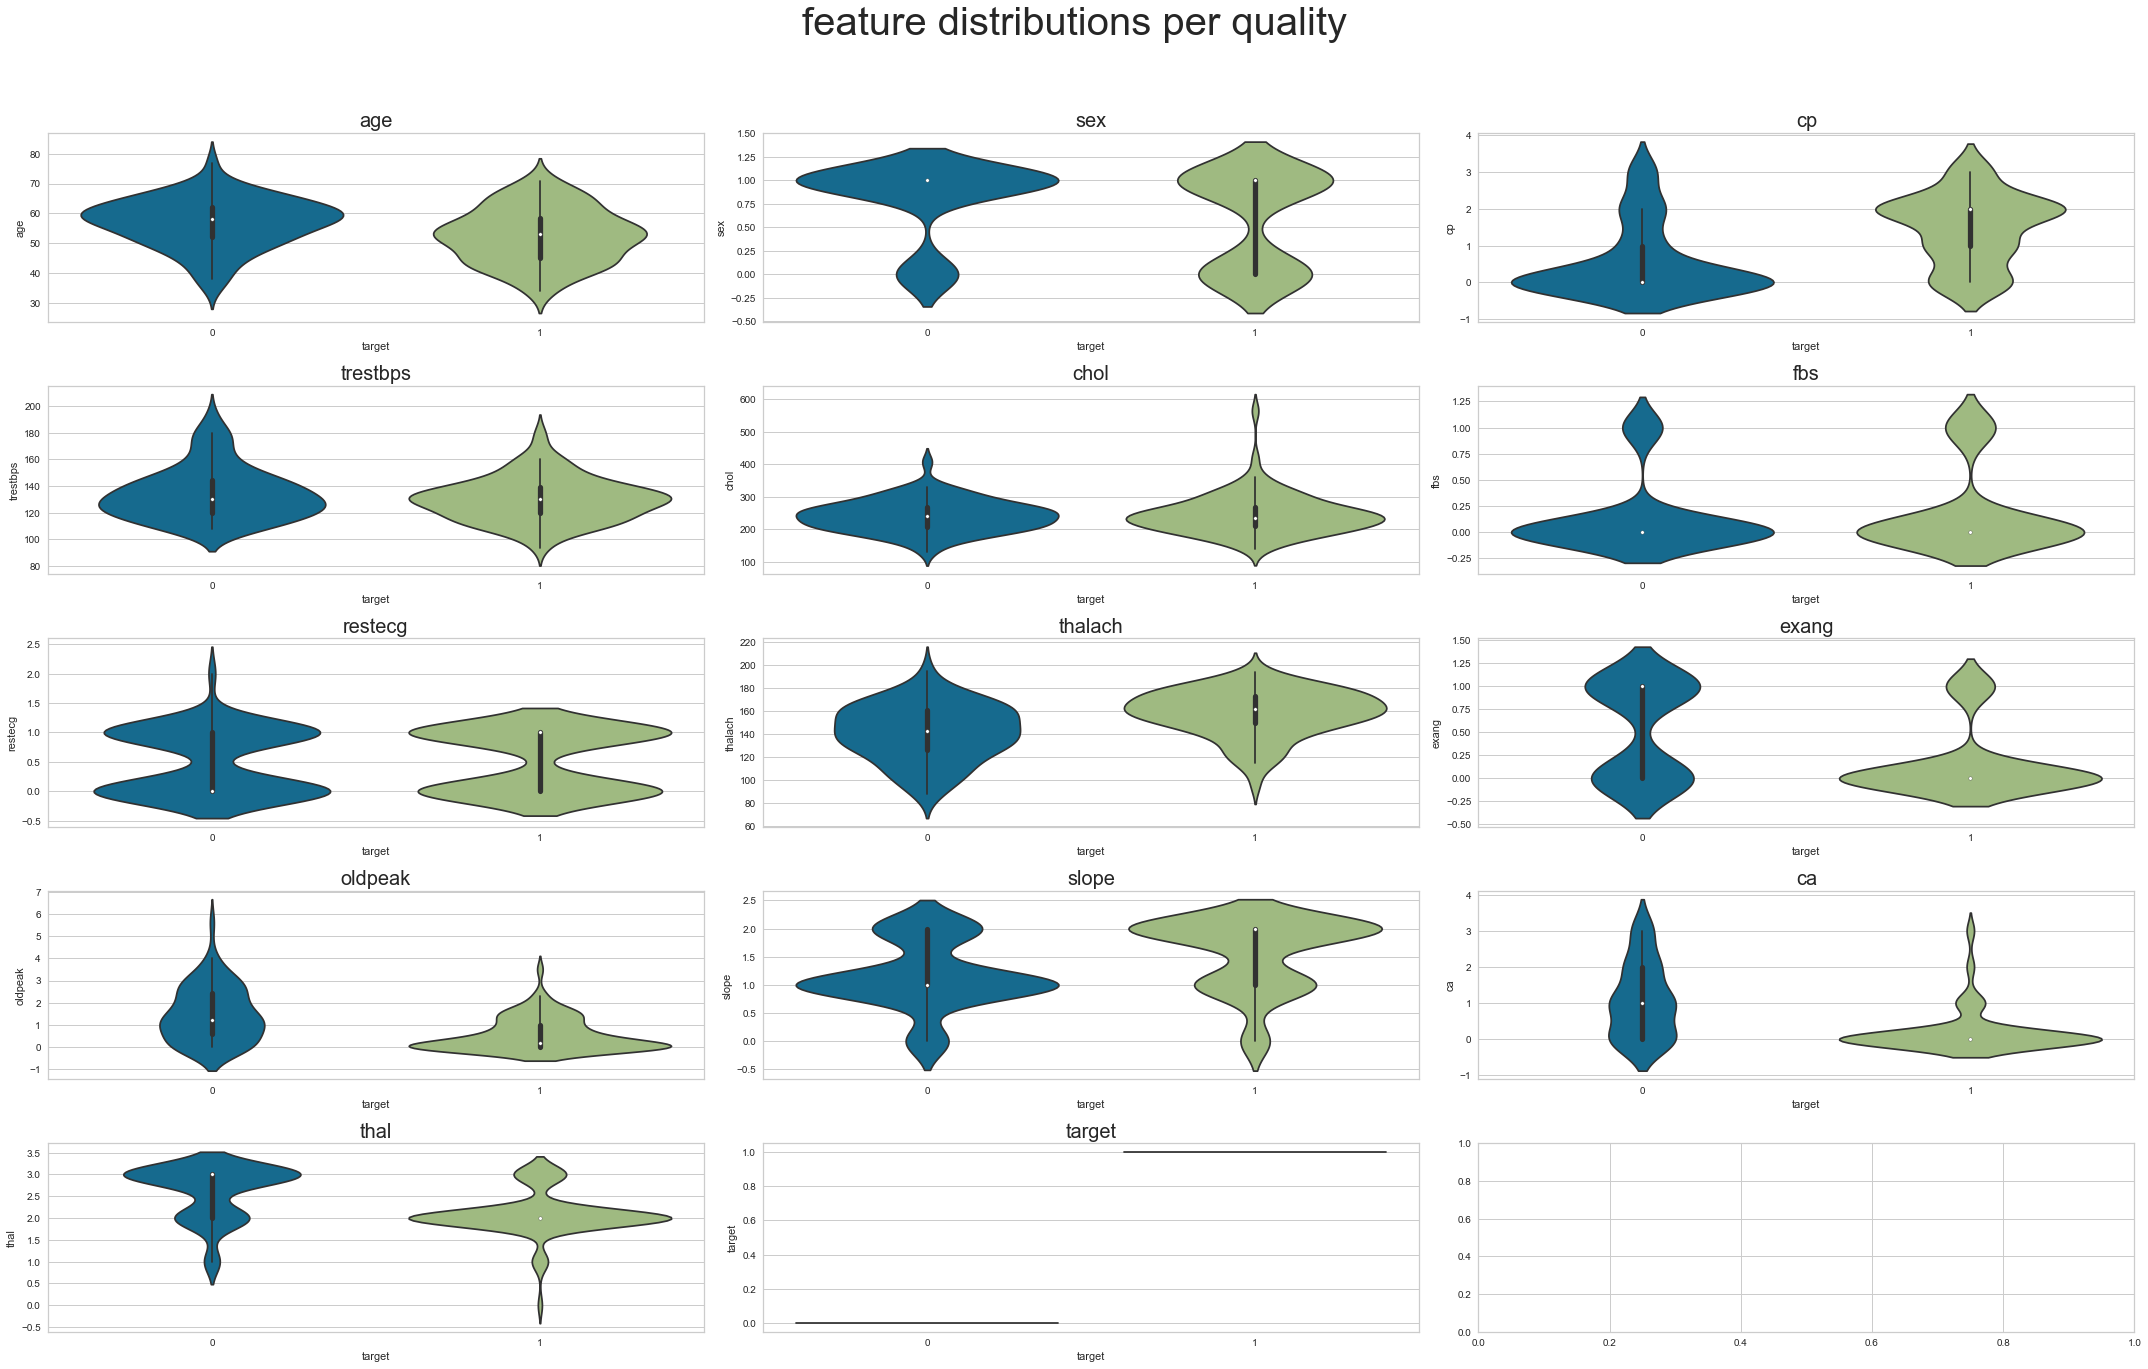

In [7]:
sns.set_style('whitegrid')   

fig, axes = plt.subplots(5, 3, figsize=(30, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns):
    sns.violinplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## categorical data 살펴보기

### cp: 가슴 통증(chest pain) 종류 
* 0 : asymptomatic 무증상
* 1 : atypical angina 일반적이지 않은 협심증
* 2 : non-anginal pain 협심증이 아닌 통증
* 3 : typical angina 일반적인 


In [11]:
pd.crosstab(train.cp, train.target, margins=True).style.background_gradient()

target,0,1,All
cp,,,
0,48,17,65
1,7,18,25
2,8,39,47
3,5,9,14
All,68,83,151


* 협심증이 아닌 통증(cp=2)일 때 심장질환 가능성 높음

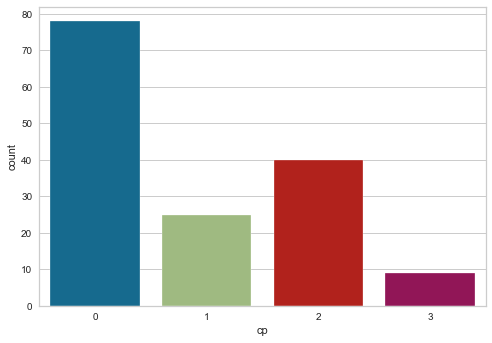

In [12]:
sns.countplot('cp', data=test)
plt.show()

### exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)

In [13]:
pd.crosstab(train.exang, train.target, margins=True).style.background_gradient()

target,0,1,All
exang,,,
0,32,70,102
1,36,13,49
All,68,83,151


* exang = 0 인 환자가 많음.

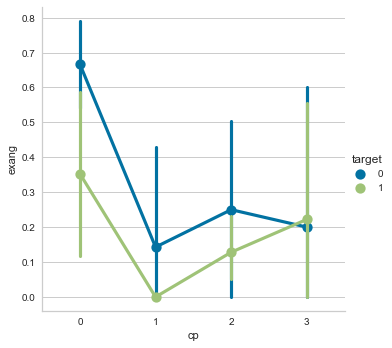

In [14]:
sns.factorplot('cp','exang',hue='target',  data=train)
plt.show()

* 활동으로 인한 협심증이 없는 무증상 환자가 많음.

### slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
* 0: downsloping 하강
* 1: flat 평탄
* 2: upsloping 상승

In [15]:
pd.crosstab(train.slope, train.target, margins=True).style.background_gradient()

target,0,1,All
slope,,,
0,7,6,13
1,43,25,68
2,18,52,70
All,68,83,151


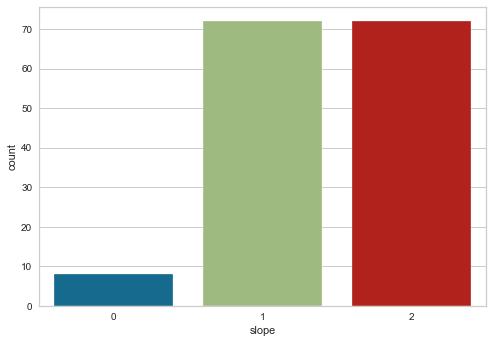

In [16]:
sns.countplot('slope', data=test)
plt.show()

### ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 4== NULL

In [17]:
pd.crosstab(train.ca, train.target, margins=True).style.background_gradient()

target,0,1,All
ca,,,
0,24,71,95
1,23,8,31
2,13,2,15
3,8,2,10
All,68,83,151


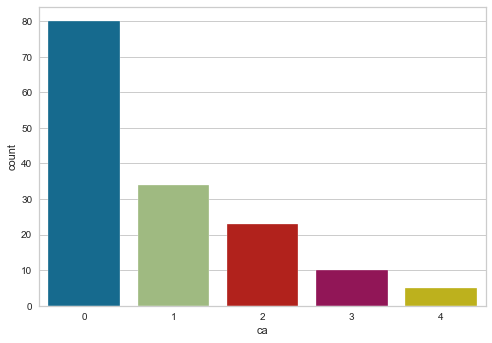

In [18]:
sns.countplot('ca', data=test)
plt.show()

In [19]:
test[test['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
id,,,,,,,,,,,,,
41,52,1,2,138,223,0,1,169,0,0.0,2,4,2
46,43,1,0,132,247,1,0,143,1,0.1,1,4,3
80,58,1,1,125,220,0,1,144,0,0.4,1,4,3
81,38,1,2,138,175,0,1,173,0,0.0,2,4,2
96,38,1,2,138,175,0,1,173,0,0.0,2,4,2


* test 데이터에 ca=4 (null) 값이 5개 포함되어 있음.

### restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
* 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
* 1: 정상
* 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

In [20]:
pd.crosstab(train.restecg, train.target, margins=True).style.background_gradient()

target,0,1,All
restecg,,,
0,35,40,75
1,32,43,75
2,1,0,1
All,68,83,151


* 심전도와는 관계 없는 것으로 보아도 무방할것 같다.

### fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)

In [21]:
pd.crosstab(train.fbs, train.target, margins=True).style.background_gradient()

target,0,1,All
fbs,,,
0,59,68,127
1,9,15,24
All,68,83,151


* 혈당과 무관

### thal: thalassemia 지중해빈혈 여부
* 0 = Null 
* 1 = normal 정상
* 2 = fixed defect 고정 결함
* 3 = reversable defect 가역 결함

In [22]:
pd.crosstab(train.thal, train.target, margins=True).style.background_gradient()

target,0,1,All
thal,,,
0,0,1,1
1,4,4,8
2,19,65,84
3,45,13,58
All,68,83,151


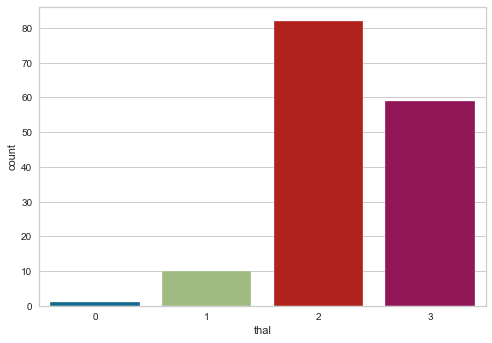

In [23]:
sns.countplot('thal', data=test)
plt.show()

## numerical data 살펴보기
### oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강

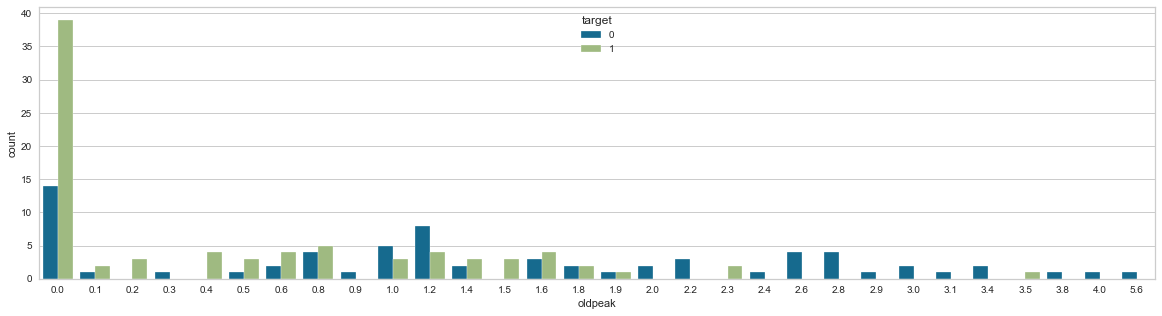

In [24]:
plt.figure(figsize=(20,5))
sns.countplot('oldpeak', data=train, hue='target')
plt.show()

* oldpeak = 0인 사람이 많음.

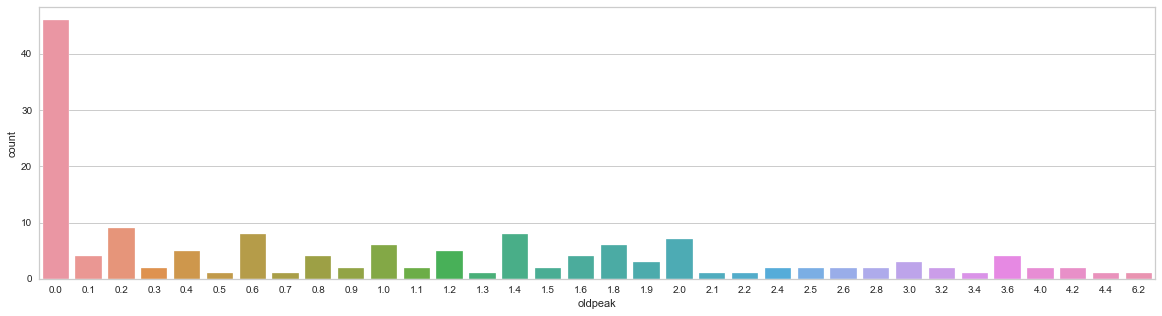

In [25]:
plt.figure(figsize=(20,5))
sns.countplot('oldpeak', data=test)
plt.show()

### trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)

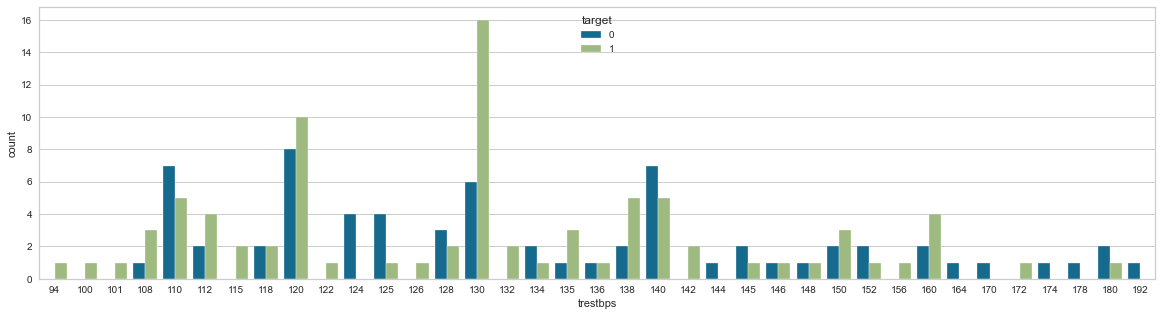

In [26]:
plt.figure(figsize=(20,5))
sns.countplot('trestbps', data=train, hue='target')
plt.show()

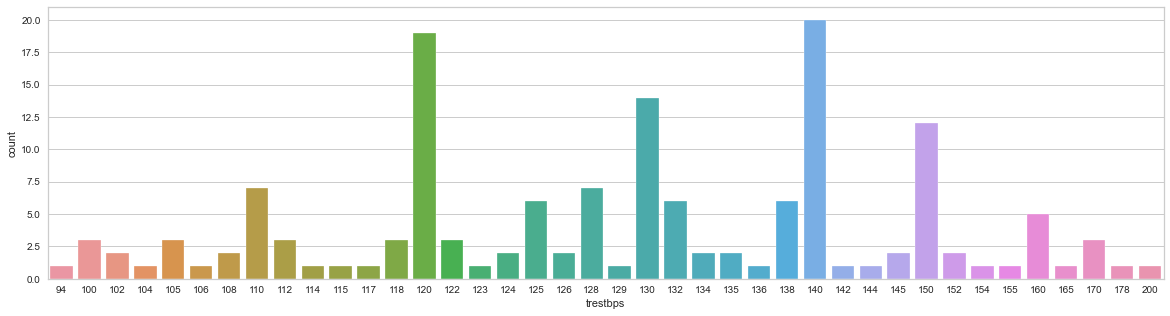

In [27]:
plt.figure(figsize=(20,5))
sns.countplot('trestbps', data=test)
plt.show()

### chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)

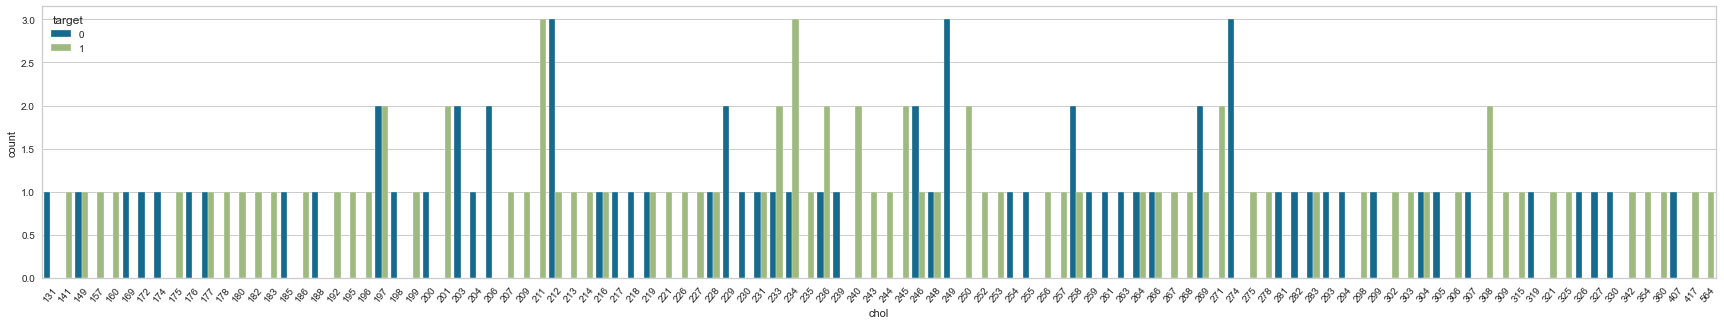

In [28]:
plt.figure(figsize=(30,5))
sns.countplot('chol', data=train, hue='target')
plt.xticks(rotation='50')
plt.show()

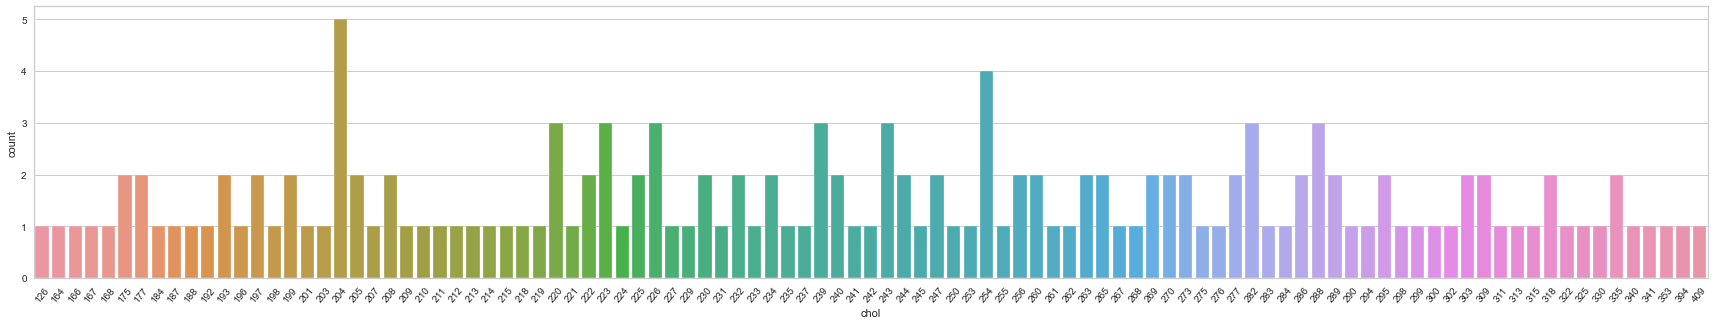

In [29]:
plt.figure(figsize=(30,5))
sns.countplot('chol', data=test)
plt.xticks(rotation='50')
plt.show()

<Figure size 1440x1440 with 0 Axes>

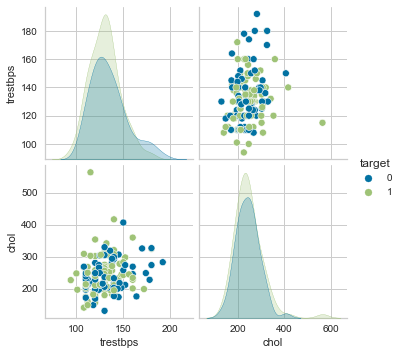

In [38]:
plt.figure(figsize=(20,20))
sns.pairplot(pd.concat([train['trestbps'],train['chol'],train['target']], axis=1), hue='target')
plt.show()

* 혈중 콜레스테롤과 혈압의 관계
* 콜레스테롤이 높으면 혈압도 높을줄 알았는데..

In [50]:
train[train['chol']>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
12,67,0,2,115,564,0,0,160,0,1.6,1,0,3.0,1


### thalach: (maximum heart rate achieved) 최대 심박수


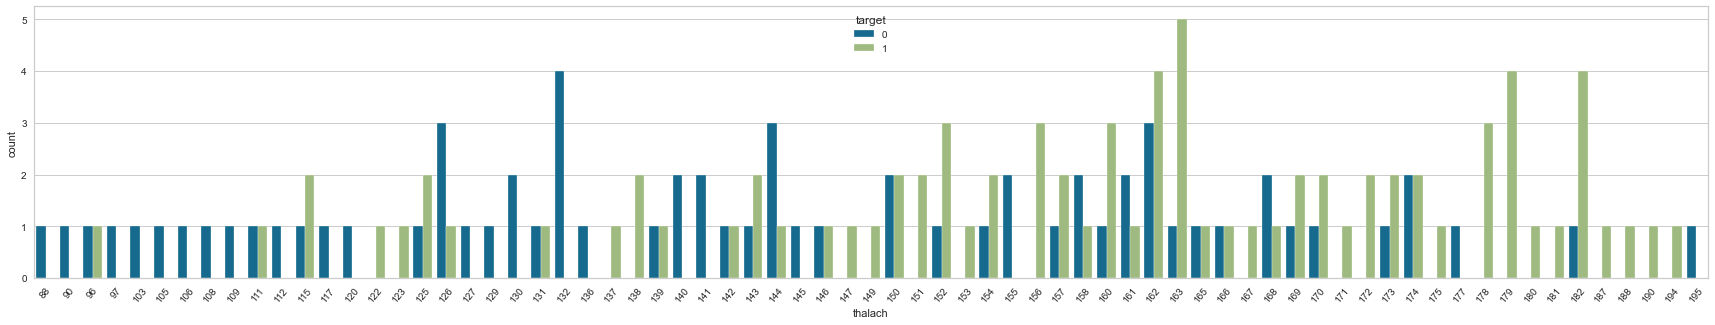

In [39]:
plt.figure(figsize=(30,5))
sns.countplot('thalach', data=train, hue='target')
plt.xticks(rotation='50')
plt.show()

* target=1이 target=0보다 최대 심박수가 높게 분포되어있음

In [53]:
train[train['thalach']==96]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
29,60,0,2,120,178,1,1,96,0,0.0,2,0,2.0,1
46,64,1,0,120,246,0,0,96,1,2.2,0,1,2.0,0


<Figure size 1440x1440 with 0 Axes>

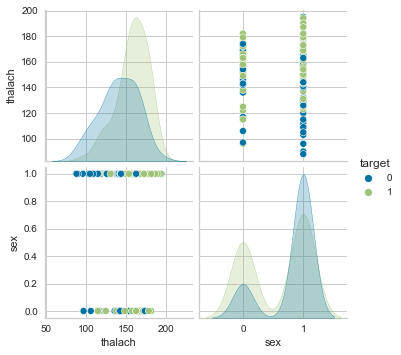

In [54]:
plt.figure(figsize=(20,20))
sns.pairplot(pd.concat([train['thalach'],train['sex'],train['target']], axis=1), hue='target')
plt.show()

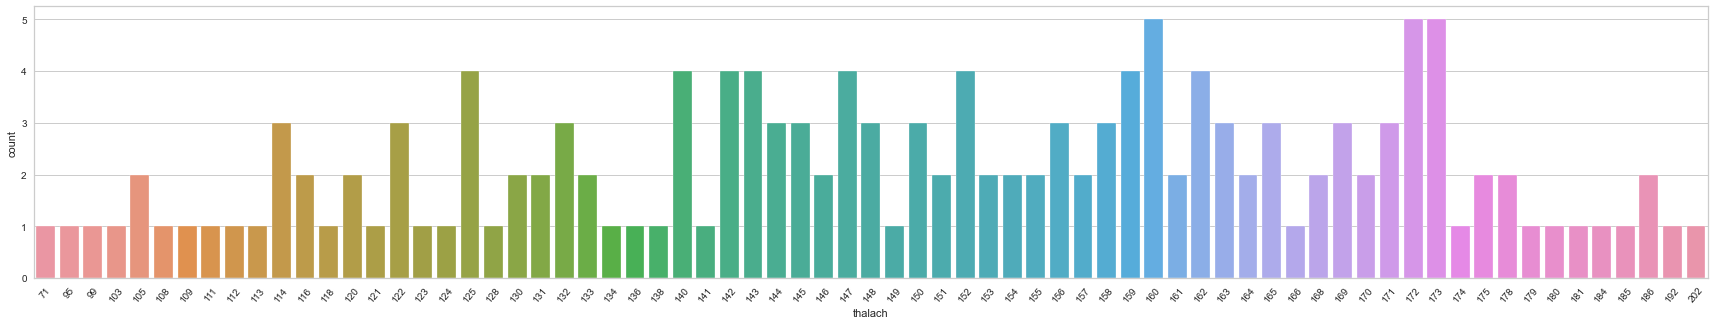

In [40]:
plt.figure(figsize=(30,5))
sns.countplot('thalach', data=test)
plt.xticks(rotation='50')
plt.show()

<Figure size 1440x1440 with 0 Axes>

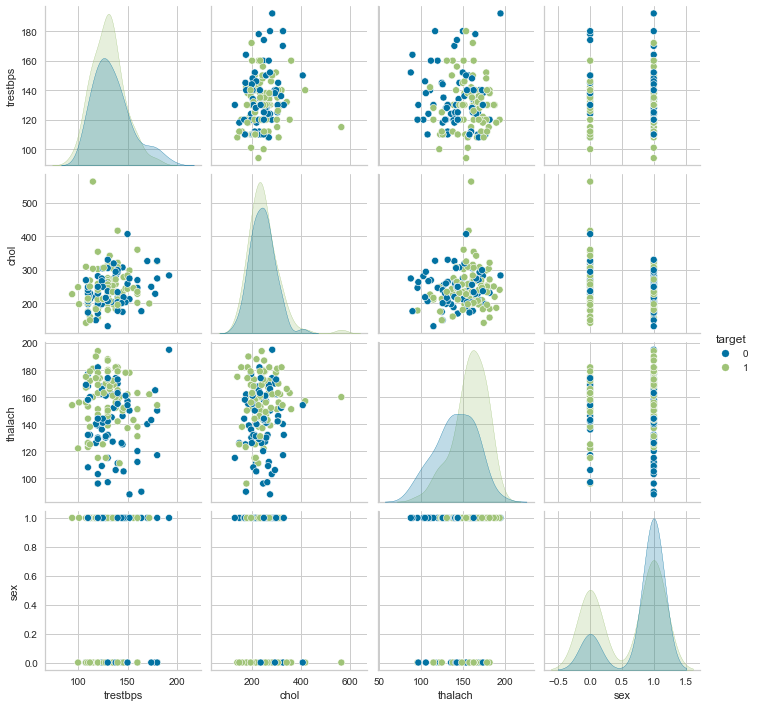

In [56]:
plt.figure(figsize=(20,20))
sns.pairplot(pd.concat([train['trestbps'],train['chol'],train['thalach'],train['sex'],train['target']], axis=1), hue='target')
plt.show()